# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [2]:
pd.set_option('display.max_columns', 500)

# Reading and inspecting the data

In [3]:
# Reading the data into a dataframe
df = pd.read_csv('Leads.csv')

In [4]:
# Lets look at the top 5 rows of the data
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

Dropping Prospect ID and Lead Number as they are unique identifiers for leads which wont be adding any information to our model

In [5]:
df.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [6]:
# Basic data check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [7]:
# Checking the shape of the data
df.shape

(9240, 35)

In [8]:
# Checking the statistical summary of the data
df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Data Cleaning

## Missing Value analysis

In [9]:
#Replacing the Select values with Nan

df.replace('Select', np.NaN, inplace=True)

In [10]:
# Checking the percentage of missing values

round((df.isna().sum()/df.shape[0])*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# Removing columns which has more than 40% missing values

cols = df.columns

for col in cols:
    if round((df[col].isna().sum()/df.shape[0])*100, 2) > 40:
        df.drop(col,axis=1,inplace=True)

In [12]:
round((df.isna().sum()/df.shape[0])*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
df.City.value_counts(normalize=True, dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [14]:
# Replacing the missing values with the mode
df.City.fillna('Mumbai',inplace=True)

In [15]:
df.Tags.value_counts(normalize=True, dropna=False)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [16]:
# Replacing the missing values with the mode
df.Tags.fillna('Will revert after reading the email', inplace=True)

In [17]:
# Combining categories with <1% frequency to Others Category

combine_tags = ['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided',
     'in touch with EINS','Lost to Others','Want to take admission but has financial problems',
     'Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student',
     'University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']

In [18]:
df['Tags'] = df['Tags'].replace(combine_tags,'Others')

In [19]:
df.Specialization.value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

Looking at the distribution, we will replace the missing values here as a separate category and not the mode. Lets replace the missing values as 'Not Specified'

In [20]:
# Replacing the missing values with the separate category
df.Specialization.fillna('Not Specified', inplace=True)

In [21]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                    'Marketing Management','Operations Management',
                                                    'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                    'Retail Management'],'Management_Specializations')

In [22]:
df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
# Replacing the missing values with the mode
df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [24]:
df['What is your current occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [25]:
# Replacing the missing values with the mode
df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [26]:
df.Country.value_counts(normalize=True, dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Nigeria                 0.000433
South Africa            0.000433
Sweden                  0.000325
Uganda                  0.000216
Italy                   0.000216
Belgium                 0.000216
China                   0.000216
Philippines             0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
Ghana                   0.000216
Tanzania                0.000108
Denmark   

In [27]:
# Replacing the missing values with the mode
df.Country.fillna('India',inplace=True)

In [28]:
# Checking the percentage of missing values

round((df.isna().sum()/df.shape[0])*100, 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [29]:
# Removing rows which have less than 2% null values 
df.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'], inplace=True)

In [30]:
# Checking if there is any more missing values
df.isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

## Outlier Analysis

In [31]:
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df[num_cols].describe(percentiles=[.25,.50,.75,.90,.95,.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

We can see that TotalVisits and Page Views Per Visit have outliers. However, Total Time Spent on Website increases gradually.

Lets look at the boxplots for each of the continuous variables to visualize the outliers better

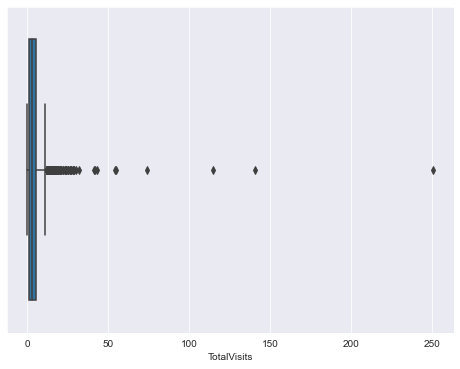

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.boxplot(df.TotalVisits)
plt.show()

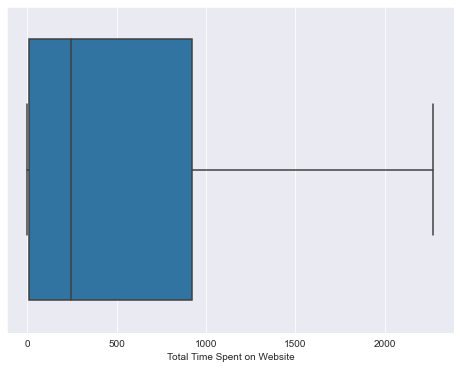

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

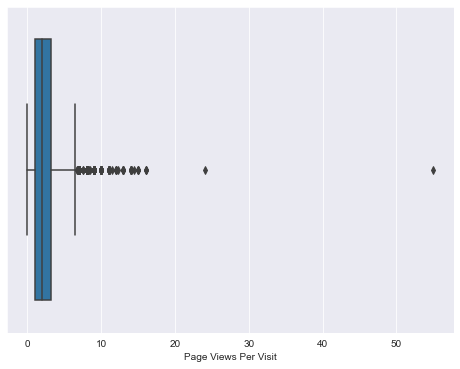

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Page Views Per Visit'])
plt.show()

TotalVisits and Page Views Per Visit have outliers. We will remove the rows which have values greater than the 99th percentile for these columns

In [35]:
df = df[(df.TotalVisits < df.TotalVisits.quantile(.99))]

df = df[(df['Page Views Per Visit'] < df['Page Views Per Visit'].quantile(.99))]

In [36]:
df[num_cols].describe(percentiles=[.25,.50,.75,.90,.95,.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8863.000000                  8863.000000           8863.000000
mean      3.098387                   478.122193              2.236941
std       2.821961                   544.532372              1.835885
min       0.000000                     0.000000              0.000000
25%       1.000000                     5.000000              1.000000
50%       3.000000                   240.000000              2.000000
75%       4.000000                   913.000000              3.000000
90%       7.000000                  1371.000000              5.000000
95%       8.000000                  1553.000000              6.000000
99%      13.000000                  1837.760000              7.000000
max      16.000000                  2272.000000              8.000000

# Exploratory Data Analysis

Checking the target variable distribution

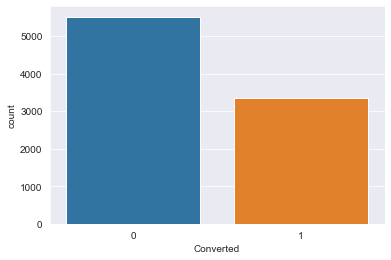

In [37]:
sns.countplot(df.Converted)
plt.show()

In [38]:
#Percent of converted leads

sum(df.Converted)/len(df.Converted)*100

37.80886832900824

As we can see, we have an imbalanced dataset which will definitely play a part in our model and we will have to decide on our evaluation metrics for our model keeping this imbalance in mind. 

We will check the distribution of the categorial variables

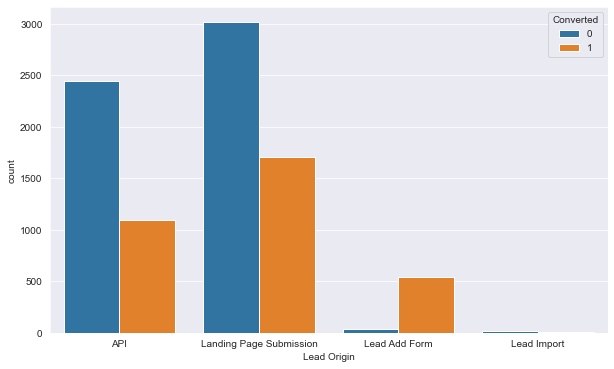

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(df['Lead Origin'], hue=df.Converted)
plt.show()

* API and Landing Page Submission bring higher number of leads as well as conversion.
* Lead Add Form has a very high conversion rate.
* Lead Import and Quick Add Form get very few leads.
* In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [40]:
df['Lead Source'].value_counts(normalize=True)

Google               0.318515
Direct Traffic       0.279815
Olark Chat           0.197337
Organic Search       0.120614
Reference            0.049870
Welingak Website     0.014555
Referral Sites       0.012750
Facebook             0.003498
bing                 0.000677
google               0.000564
Click2call           0.000451
Social Media         0.000226
Live Chat            0.000226
testone              0.000113
NC_EDM               0.000113
youtubechannel       0.000113
blog                 0.000113
WeLearn              0.000113
Press_Release        0.000113
Pay per Click Ads    0.000113
welearnblog_Home     0.000113
Name: Lead Source, dtype: float64

We can see that google and Google are two different entries in the 'Lead Source'. We will combine them. Also, we can combine Facebook and Social Media. 

In [41]:
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [42]:
# Combining categories with <1% frequency to Others Category

df['Lead Source'] = df['Lead Source'].replace(['Social Media','bing','Click2call','Live Chat','testone',
                                               'Pay per Click Ads','youtubechannel','WeLearn','NC_EDM',
                                              'Press_Release','blog','welearnblog_Home'] ,'Others')  

In [43]:
df['Lead Source'].value_counts(normalize=True)

Google              0.319079
Direct Traffic      0.279815
Olark Chat          0.197337
Organic Search      0.120614
Reference           0.049870
Welingak Website    0.014555
Referral Sites      0.012750
Others              0.005980
Name: Lead Source, dtype: float64

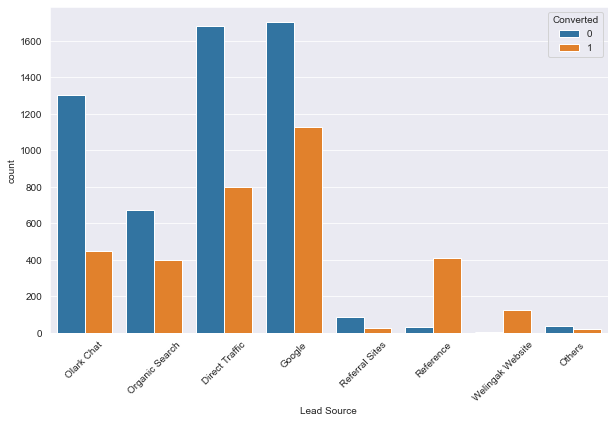

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df['Lead Source'], hue=df.Converted)
plt.xticks(rotation=45)
plt.show()

* Maximum number of leads are generated by Google and Direct traffic.
* Conversion Rate of reference leads and leads through welingak website is high.

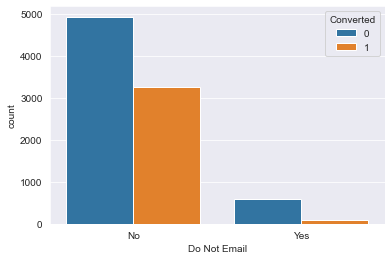

In [45]:
sns.countplot(df['Do Not Email'], hue=df.Converted)
plt.show()

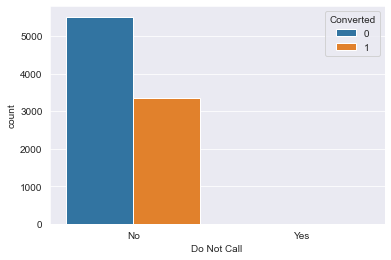

In [46]:
sns.countplot(df['Do Not Call'],hue=df.Converted)
plt.show()

In [47]:
df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.379330
SMS Sent                        0.299786
Olark Chat Conversation         0.108654
Page Visited on Website         0.066005
Converted to Lead               0.048178
Email Bounced                   0.034864
Email Link Clicked              0.029787
Form Submitted on Website       0.012750
Unreachable                     0.009703
Unsubscribed                    0.006544
Had a Phone Conversation        0.002708
Approached upfront              0.000564
View in browser link Clicked    0.000451
Email Marked Spam               0.000226
Email Received                  0.000226
Resubscribed to emails          0.000113
Visited Booth in Tradeshow      0.000113
Name: Last Activity, dtype: float64

In [48]:
# Combining categories with <1% frequency to Others Category

df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Visited Booth in Tradeshow',
                                                         'Resubscribed to emails'],'Others')

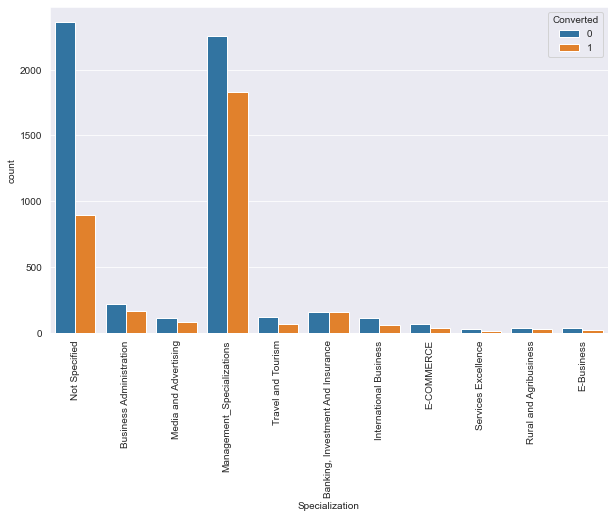

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(df.Specialization, hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [50]:
df.Country.value_counts(normalize=True)

India                   0.968521
United States           0.007560
United Arab Emirates    0.005867
Singapore               0.002595
Saudi Arabia            0.002257
United Kingdom          0.001692
Australia               0.001467
Qatar                   0.001128
Hong Kong               0.000790
Bahrain                 0.000790
Oman                    0.000677
France                  0.000564
Canada                  0.000451
Kuwait                  0.000451
unknown                 0.000451
Germany                 0.000451
Nigeria                 0.000451
South Africa            0.000451
Sweden                  0.000338
China                   0.000226
Italy                   0.000226
Uganda                  0.000226
Belgium                 0.000226
Philippines             0.000226
Bangladesh              0.000226
Asia/Pacific Region     0.000226
Ghana                   0.000226
Tanzania                0.000113
Denmark                 0.000113
Malaysia                0.000113
Kenya     

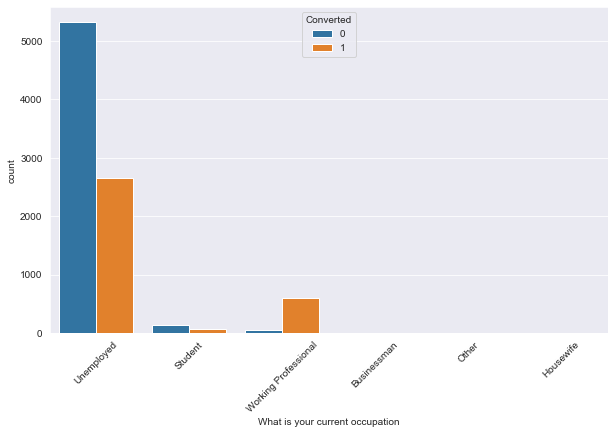

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(df['What is your current occupation'], hue=df.Converted)
plt.xticks(rotation=45)
plt.show()

* Working Professionals leads have high chances of joining it.
* Unemployed leads are the most in terms of absolute numbers.

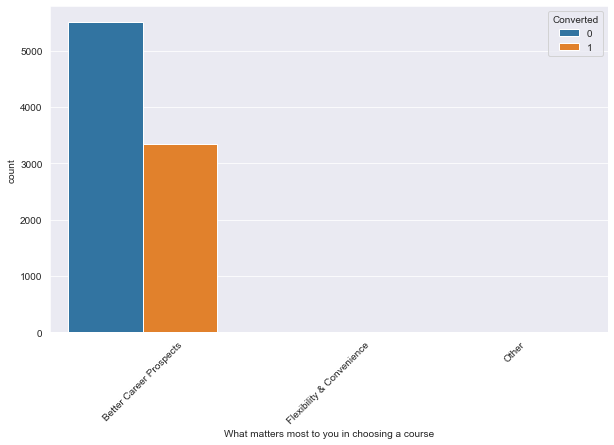

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(df['What matters most to you in choosing a course'],hue=df.Converted)
plt.xticks(rotation=45)
plt.show()

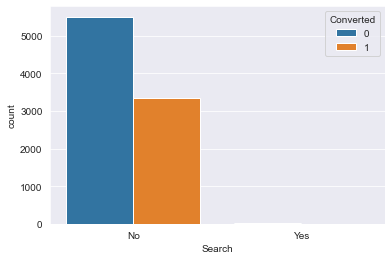

In [53]:
sns.countplot(df.Search,hue=df.Converted)
plt.show()

In [54]:
df.Magazine.value_counts()

No    8863
Name: Magazine, dtype: int64

In [55]:
df['Newspaper Article'].value_counts()

No    8863
Name: Newspaper Article, dtype: int64

In [56]:
df['X Education Forums'].value_counts()

No    8863
Name: X Education Forums, dtype: int64

In [57]:
df.Newspaper.value_counts()

No     8862
Yes       1
Name: Newspaper, dtype: int64

In [58]:
df['Digital Advertisement'].value_counts()

No     8861
Yes       2
Name: Digital Advertisement, dtype: int64

In [59]:
df['Through Recommendations'].value_counts()

No     8857
Yes       6
Name: Through Recommendations, dtype: int64

In [60]:
df['Receive More Updates About Our Courses'].value_counts()

No    8863
Name: Receive More Updates About Our Courses, dtype: int64

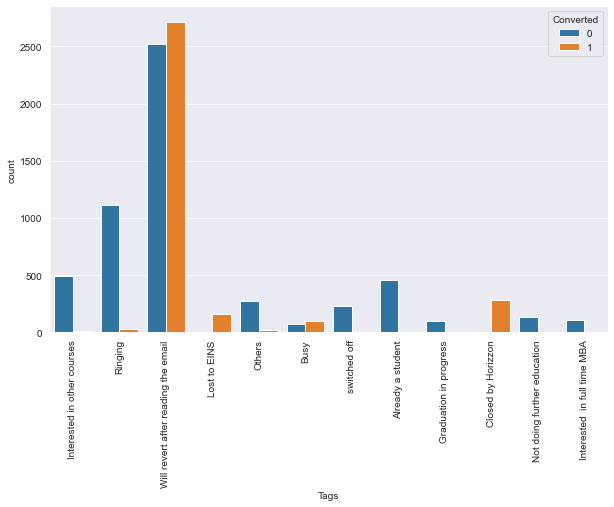

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(df.Tags,hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [62]:
df['Update me on Supply Chain Content'].value_counts()

No    8863
Name: Update me on Supply Chain Content, dtype: int64

In [63]:
df['Get updates on DM Content'].value_counts()

No    8863
Name: Get updates on DM Content, dtype: int64

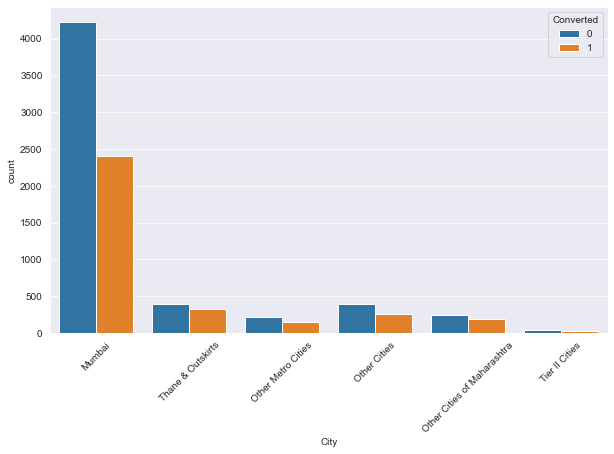

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(df.City,hue=df.Converted)
plt.xticks(rotation=45)
plt.show()

In [65]:
df['I agree to pay the amount through cheque'].value_counts()

No    8863
Name: I agree to pay the amount through cheque, dtype: int64

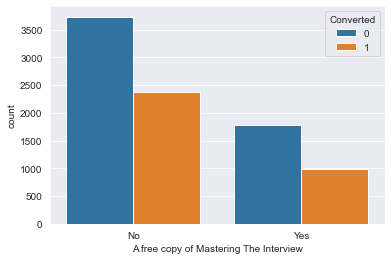

In [66]:
sns.countplot(df['A free copy of Mastering The Interview'],hue=df.Converted)
plt.show()

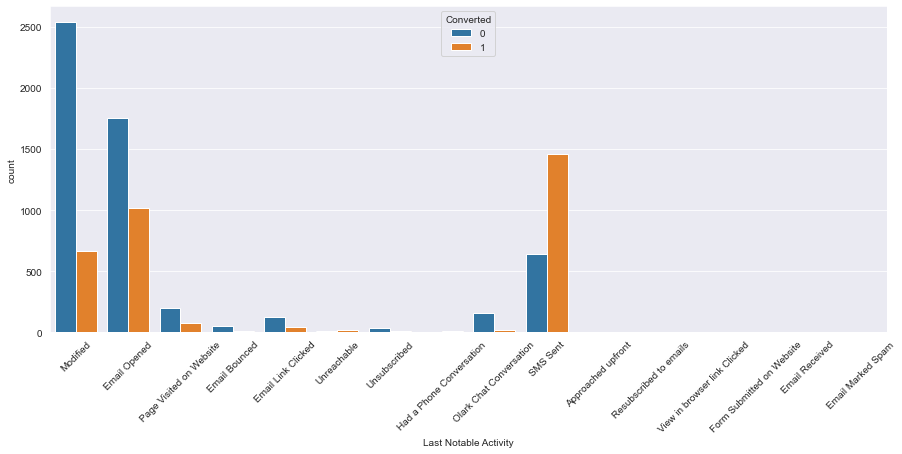

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(df['Last Notable Activity'],hue=df.Converted)
plt.xticks(rotation=45)
plt.show()

From our analysis above, we can see that the below columns

- Do Not Email
- Do Not Call
- What matters most to you in choosing a course
- Search
- Magazine
- Country
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

all have very low or no variability. As such, they wont be adding any value to our model and we can drop these columns from our data. 

In [68]:
cols_to_drop = ['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course','Search',
'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
'Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [69]:
df.drop(columns=cols_to_drop, inplace=True)

In [70]:
df.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0            Not Specified                      Unemployed   
1            Not Specified                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4            Not Specified                      Unemployed   

                                  Tags    City  \
0          Interested in other courses  Mumbai   
1                              Ringing  Mumbai   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Let us visualize the numerical distributions 

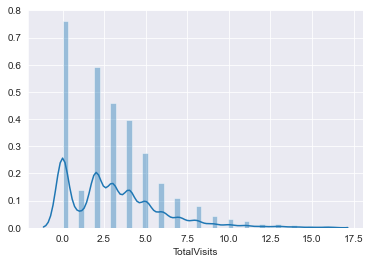

In [71]:
sns.distplot(df.TotalVisits)
plt.show()

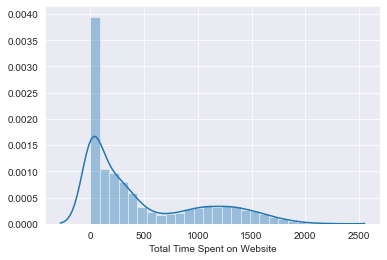

In [72]:
sns.distplot(df['Total Time Spent on Website'])
plt.show()

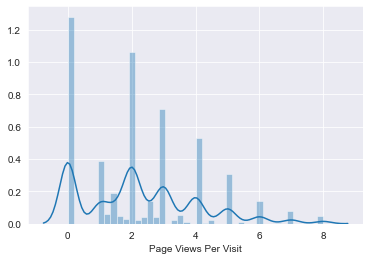

In [73]:
sns.distplot(df['Page Views Per Visit'])
plt.show()

Each of the distributions seems to be skewed.

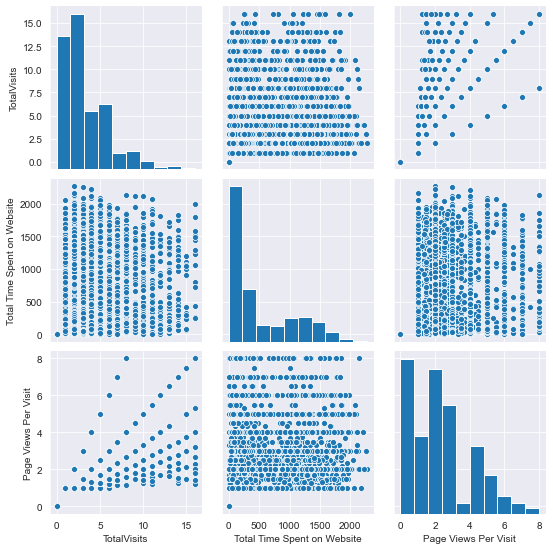

In [74]:
sns.pairplot(df[num_cols])
plt.show()

There doesnt seem to be any strong linear relationships between the variables though there is some linear relationship between totalvisits and Page Views Per Visit 

## Encoding Categorical variables

#### Converting binary variable(Yes/No) to 0/1

In [75]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [76]:
df['A free copy of Mastering The Interview'].value_counts()

0    6103
1    2760
Name: A free copy of Mastering The Interview, dtype: int64

#### One hot encoding

In [77]:
cat_cols = ['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

In [78]:
# Creating a dummy variable for categorical variables and dropping the first one.
dummy = pd.get_dummies(df[cat_cols], drop_first=True)

# Concatenating the result with the dataframe
df = pd.concat([df,dummy], axis=1)

In [79]:
# dropping the repeated variables 
df.drop(columns=cat_cols, inplace=True)

In [80]:
df.shape

(8863, 69)

In [81]:
df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                               

### Correlation Analysis

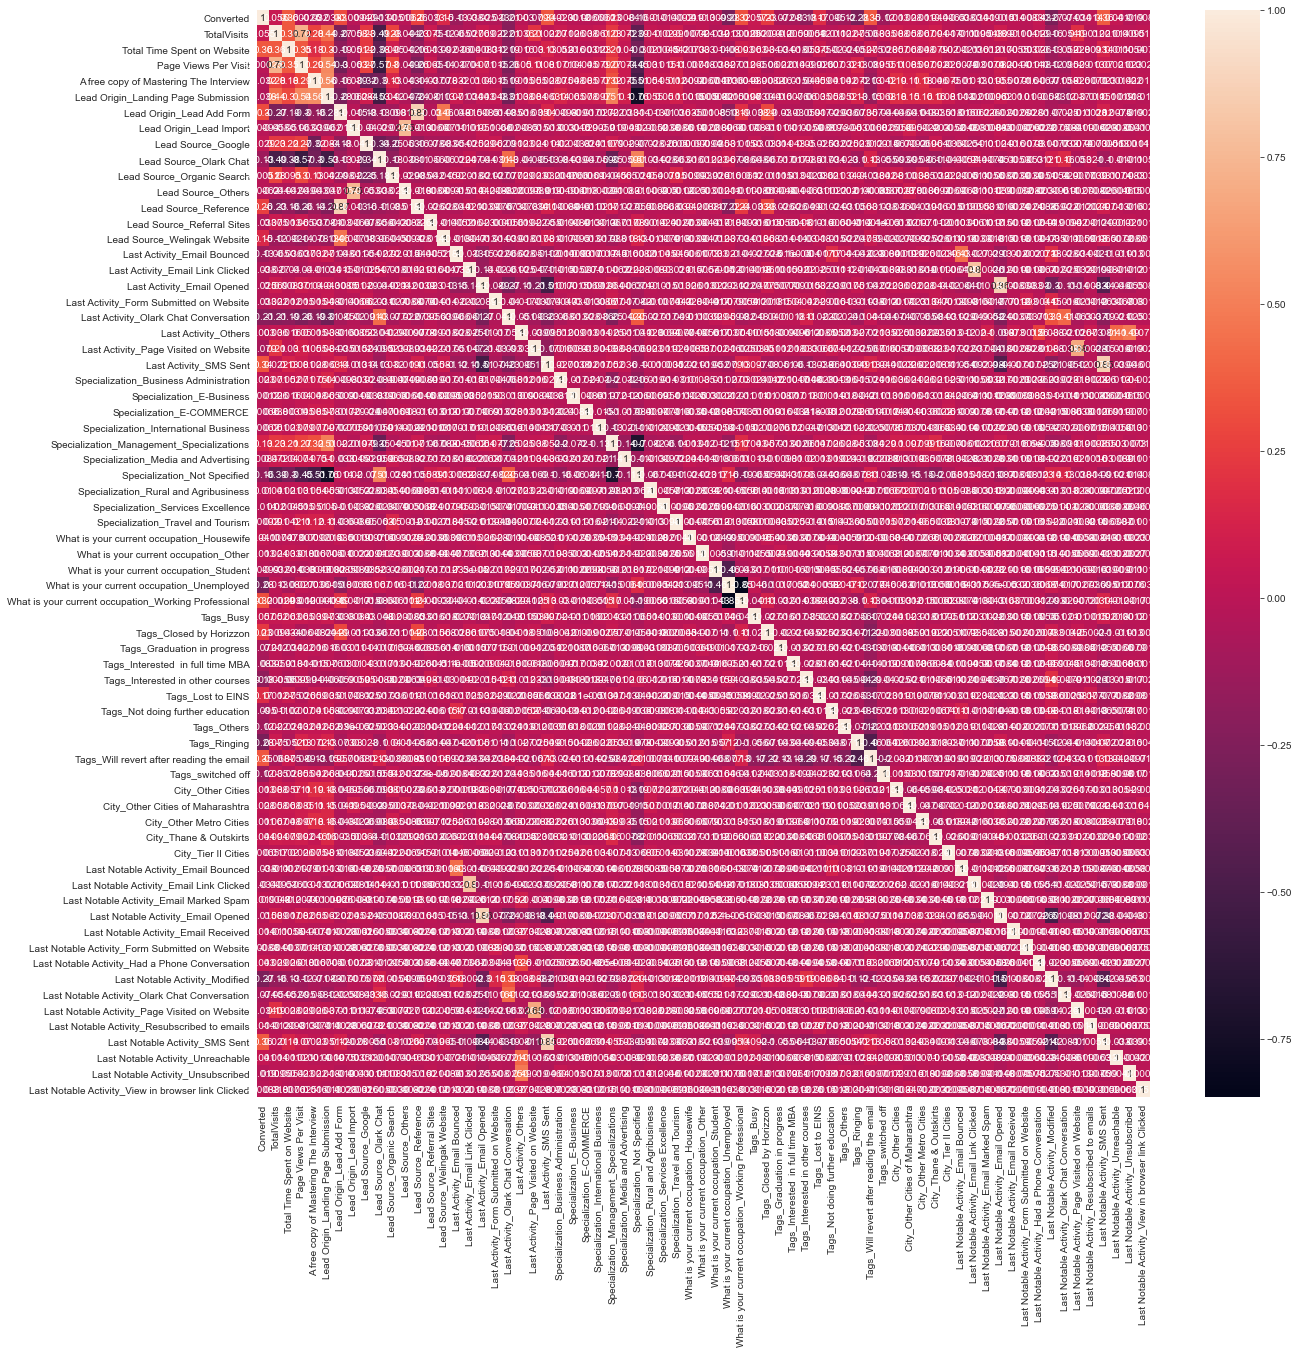

In [82]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Thogh there are some dummy variables which are correlated, we will use RFE and statistical significance during our model building process to select the most relevant features

# Model Building

## Train Test Split

In [83]:
X = df.drop('Converted',axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                             

In [84]:
y=df.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Feature Scaling

In [86]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train[num_cols].head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
5425    -0.024078                    -0.617232              0.421959
8586     0.335002                    -0.241036              0.967428
4631     0.694082                    -0.224520              0.149225
4464    -0.024078                    -0.536488             -0.396244
2058     1.412241                    -0.602552             -0.450791

### Feature Selection Using RFE

In [87]:
# Running RFE with 15 variables

logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 38),
 ('A free copy of Mastering The Interview', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 46),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Opened', False, 29),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 18),
 ('Last Activity_Page Visited on Website', False, 53),
 ('Last Activity_SMS Sent', False, 11),
 ('Specialization_Business Administra

In [89]:
col = X_train.columns[rfe.support_]

In [90]:
# Dropped columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       

### Model building using statsmodel

In [91]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col])
model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1897.4
Date:                Wed, 14 Jul 2021   Deviance:                       3794.8
Time:                        21:17:52   Pearson chi2:                 1.17e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3915      0.251     -1.561      0.118      -0.883       0.100
Lead Origin_Landing Page Submission               -1.5720      0.153    -10.244      0.000      -1.873      -1.271
Lead Origin_Lead Add Form                          1.5509      0.320      4.840      0.000       0.923       2.179
Lead Source_Welingak Website                       2.8911      1.071      2.700      0.007       0.792       4.990
Last Activity_Email Bounced                       -1.7591      0.341     -5.158      0.000      -2.428      -1.091
Last Activity_Olark Chat Conversation             -1.5285      0.173     -8.824      0.000      -1.868      -1.189
Specialization_Not Specified                      -1.9106      0.156    -12.275      0.000      -2.216      -1.605
What is your current occupation_Unemployed        -2.3562      0.187    -12.600      0.000      -2.723      -1.990
Tags_Busy                                          3.1023      0.297     10.436      0.000       2.520       3.685
Tags_Closed by Horizzon                            8.9475      1.028      8.700      0.000       6.932      10.963
Tags_Lost to EINS                                  8.1626      0.627     13.022      0.000       6.934       9.391
Tags_Ringing                                      -1.1750      0.318     -3.700      0.000      -1.797      -0.553
Tags_Will revert after reading the email           3.7402      0.202     18.557      0.000       3.345       4.135
Tags_switched off                                 -0.9811      0.555     -1.766      0.077      -2.070       0.108
Last Notable Activity_Had a Phone Conversation    22.5435   1.46e+04      0.002      0.999   -2.86e+04    2.86e+04
Last Notable Activity_SMS Sent                     2.6141      0.114     22.916      0.000       2.391       2.838
==================================================================================================================
"""

Last Notable Activity_Had a Phone Conversation has a very high p-value. We will drop this column and then rebuild our model

In [92]:
col = col.drop('Last Notable Activity_Had a Phone Conversation')

Rebuilding the model

In [93]:
X_train_sm = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1903.9
Date:                Wed, 14 Jul 2021   Deviance:                       3807.9
Time:                        21:17:52   Pearson chi2:                 1.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.3783      0.251     -1.510      0.131      -0.869       0.113
Lead Origin_Landing Page Submission           -1.5855      0.153    -10.375      0.000      -1.885      -1.286
Lead Origin_Lead Add Form                      1.5413      0.321      4.802      0.000       0.912       2.170
Lead Source_Welingak Website                   2.8973      1.071      2.705      0.007       0.798       4.997
Last Activity_Email Bounced                   -1.7684      0.341     -5.185      0.000      -2.437      -1.100
Last Activity_Olark Chat Conversation         -1.5358      0.173     -8.865      0.000      -1.875      -1.196
Specialization_Not Specified                  -1.9325      0.155    -12.458      0.000      -2.236      -1.628
What is your current occupation_Unemployed    -2.3543      0.187    -12.590      0.000      -2.721      -1.988
Tags_Busy                                      3.1044      0.297     10.448      0.000       2.522       3.687
Tags_Closed by Horizzon                        8.9502      1.029      8.702      0.000       6.934      10.966
Tags_Lost to EINS                              8.1660      0.627     13.023      0.000       6.937       9.395
Tags_Ringing                                  -1.1682      0.318     -3.678      0.000      -1.791      -0.546
Tags_Will revert after reading the email       3.7517      0.202     18.610      0.000       3.357       4.147
Tags_switched off                             -0.9746      0.556     -1.755      0.079      -2.063       0.114
Last Notable Activity_SMS Sent                 2.6063      0.114     22.844      0.000       2.383       2.830
==============================================================================================================
"""

Tags_switched off has a high p-value. We will drop this column and rebuild the model

In [94]:
col = col.drop('Tags_switched off')

Rebuilding the model

In [95]:
X_train_sm = sm.add_constant(X_train[col])
model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1905.8
Date:                Wed, 14 Jul 2021   Deviance:                       3811.6
Time:                        21:17:52   Pearson chi2:                 1.14e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.4764      0.252     -1.892      0.058      -0.970       0.017
Lead Origin_Landing Page Submission           -1.6060      0.153    -10.467      0.000      -1.907      -1.305
Lead Origin_Lead Add Form                      1.5573      0.323      4.823      0.000       0.924       2.190
Lead Source_Welingak Website                   2.8793      1.072      2.687      0.007       0.779       4.980
Last Activity_Email Bounced                   -1.7706      0.342     -5.182      0.000      -2.440      -1.101
Last Activity_Olark Chat Conversation         -1.5386      0.173     -8.869      0.000      -1.879      -1.199
Specialization_Not Specified                  -1.9468      0.156    -12.494      0.000      -2.252      -1.641
What is your current occupation_Unemployed    -2.4064      0.189    -12.750      0.000      -2.776      -2.036
Tags_Busy                                      3.2863      0.286     11.501      0.000       2.726       3.846
Tags_Closed by Horizzon                        9.1163      1.026      8.882      0.000       7.105      11.128
Tags_Lost to EINS                              8.3345      0.623     13.374      0.000       7.113       9.556
Tags_Ringing                                  -0.9784      0.306     -3.201      0.001      -1.577      -0.379
Tags_Will revert after reading the email       3.9212      0.189     20.764      0.000       3.551       4.291
Last Notable Activity_SMS Sent                 2.5763      0.112     22.972      0.000       2.356       2.796
==============================================================================================================
"""

Since all the varables have p-values within the range of .05,  we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Source_Welingak Website  1.34
8                      Tags_Closed by Horizzon  1.22
7                                    Tags_Busy  1.11
9                            Tags_Lost to EINS  1.09
3                  Last Activity_Email Bounced  1.07
1                    Lead Origin_Lead Add Form  0.65
5                 Specialization_Not Specified  0.37
4        Last Activity_Olark Chat Conversation  0.33
6   What is your current occupation_Unemployed  0.26
12              Last Notable Activity_SMS Sent  0.21
10                                Tags_Ringing  0.09
11    Tags_Will revert after reading the email  0.07
0          Lead Origin_Landing Page Submission  0.01

Based on the p-values for the coefficients, we can see that all independent variables are significant in our model. Also, we can infer that there is no multicollinearity based on the VIFs we calculated above. 

So we can take this model as our final model

In [97]:
# Getting the Predicted probabilities on the train set
y_train_pred = model3.predict(X_train_sm)
y_train_pred[:10]

5425    0.988050
8586    0.088002
4631    0.004205
4464    0.037992
2058    0.361769
1719    0.011109
2286    0.881698
1433    0.110811
5550    0.079657
8333    0.287323
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98804969, 0.08800164, 0.00420515, 0.03799182, 0.36176901,
       0.01110877, 0.88169823, 0.11081091, 0.0796568 , 0.28732322])

In [99]:
# Creating a Dataframe with the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          1        0.988050         5425
1          0        0.088002         8586
2          0        0.004205         4631
3          0        0.037992         4464
4          0        0.361769         2058

Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0          1        0.988050         5425          1
1          0        0.088002         8586          0
2          0        0.004205         4631          0
3          0        0.037992         4464          0
4          0        0.361769         2058          0

In [101]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3713  150]
 [ 626 1715]]


In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8749194068343005

Lets check other metrics beyond accuracy

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7325929090132423

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.9611700750711882

In [106]:
# Calculate false postive rate - predicting conversion when customer does not have convert
FP/ float(TN+FP)

0.03882992492881181

In [107]:
# positive predictive value 
TP / float(TP+FP)

0.9195710455764075

In [108]:
# Negative predictive value
TN / float(TN+ FN)

0.8557271260659138

### Plotting the ROC curve

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob,drop_intermediate=False)

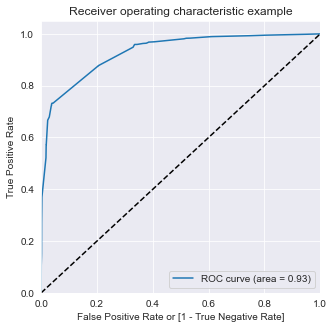

In [111]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The AUC for ROC Curve should be a value close to 1. We are getting a value of .93 indicating a good predictive model.

## Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value for Converted_prob. As there is a trade-off between sensitivity and specificity, in our case, we have to balance sensitivity and specificity in a way that we can maximise the sensitivity without compromising specificity too much

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.988050         5425          1    1    1    1    1    1   
1          0        0.088002         8586          0    1    0    0    0    0   
2          0        0.004205         4631          0    1    0    0    0    0   
3          0        0.037992         4464          0    1    0    0    0    0   
4          0        0.361769         2058          0    1    1    1    1    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.749839  0.966254  0.618690
0.2   0.2  0.774500  0.959419  0.662439
0.3   0.3  0.825919  0.877830  0.794460
0.4   0.4  0.873791  0.733020  0.959099
0.5   0.5  0.874919  0.732593  0.961170
0.6   0.6  0.874758  0.729176  0.962982
0.7   0.7  0.872824  0.724050  0.962982
0.8   0.8  0.859768  0.666809  0.976702
0.9   0.9  0.760638  0.369927  0.997411


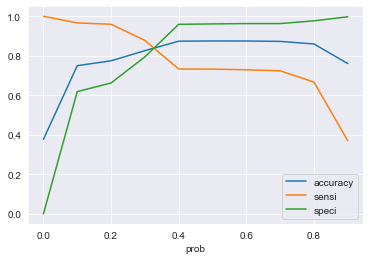

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability such that we can maximize sensitivity without reducing specificity too much

In [115]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.988050         5425          1    1    1    1    1    1   
1          0        0.088002         8586          0    1    0    0    0    0   
2          0        0.004205         4631          0    1    0    0    0    0   
3          0        0.037992         4464          0    1    0    0    0    0   
4          0        0.361769         2058          0    1    1    1    1    0   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    1    1    1    1    1                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                1

### Lead Score Assignment

In [116]:
# Let us assign the Lead score based on the probabilities
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_Predicted  Lead_Score
0          1        0.988050         5425                1          99
1          0        0.088002         8586                0           9
2          0        0.004205         4631                0           0
3          0        0.037992         4464                0           4
4          0        0.361769         2058                1          36

# Model Evaluation

Since the data is imbalanced, we cannot rely only on accuracy to evaluate our model performance. We will look into sensitivity, specificity, precision, recall, false positive rate, positive predictive rate and negative predictive rate of the model using the confusion matrix.

Among these, our objective is to increase the sensitivity/recall as much as possible without compromising on the specificity or precision of the model too much. (Even though  there is a trade off involved) 

In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8259187620889749

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
print(confusion2)

[[3069  794]
 [ 286 2055]]


In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8778299871849637

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.7944602640434895

In [122]:
# False postive rate - predicting conversion when customer does not have convert
FP/ float(TN+FP)

0.20553973595651048

In [123]:
# positive predictive value 
TP / float(TP+FP)

0.7213057213057213

In [124]:
# Negative predictive value
TN / float(TN+ FN)

0.9147540983606557

Let us also check Precision and Recall for the model

In [125]:
# Precision
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7213057213057213

In [126]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8778299871849637

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

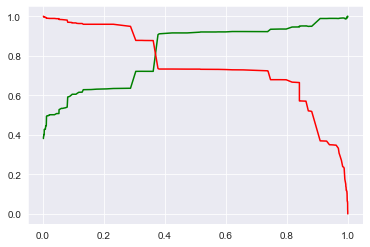

In [128]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

As we can see that approximately a cutoff closer to 0.4 would have given a balanced precision and recall. However, in our model we would want to increase recall as much as possible without compromising the precision too much. Hence, a cutoff of .3 seems to work fine.

### Observations

We can see above model is performing well. The AUC for ROC curve has a value of 0.93, which is very good. We have the following evaluation metrics for the Train Data:

- Accuracy : 82.59%
- Sensitivity : 87.78%
- Specificity : 79.44%
- False postive rate : 20.55%
- Positive predictive value : 72.13%
- Negative predictive value : 91.47%
- Precision : 72.13%
- Recall : 87.78%

# Making predictions on the test set

In [129]:
# Scaling X_test using the fitted scaler

X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test[num_cols].head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
8788     1.053161                     1.647288              2.058365
7813    -0.024078                    -0.402525              0.421959
2403     3.925797                     1.733538              0.312865
7243     0.694082                     1.203193              0.149225
5363     0.335002                     2.067527              0.967428

In [130]:
X_test = X_test[col]
X_test.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8788                                    1                          0   
7813                                    1                          0   
2403                                    1                          0   
7243                                    0                          0   
5363                                    1                          0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
8788                             0                            0   
7813                             0                            0   
2403                             0                            0   
7243                             0                            0   
5363                             0                            0   

      Last Activity_Olark Chat Conversation  Specialization_Not Specified  \
8788                                      0                             0   
7813                                      0                             0   
2403                                      0                             0   
7243                                      0                             1   
5363                                      0                             0   

      What is your current occupation_Unemployed  Tags_Busy  \
8788                                           1          0   
7813                                           1          0   
2403                                           1          0   
7243                                           1          0   
5363                                           1          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
8788                        0                  0             1   
7813                        0                  0             0   
2403                        0                  0             0   
7243                        1                  0             0   
5363                        0                  0             0   

      Tags_Will revert after reading the email  Last Notable Activity_SMS Sent  
8788                                         0                               1  
7813                                         0                               0  
2403                                         1                               1  
7243                                         0                               0  
5363                                         1                               1

In [131]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [132]:
y_test_pred = model3.predict(X_test_sm)

In [133]:
y_test_pred[:10]

8788    0.052604
7813    0.011109
2403    0.881698
7243    0.986437
5363    0.881698
3918    0.231030
3345    0.287323
917     0.287323
7732    0.287323
1702    0.361769
dtype: float64

In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [135]:
y_pred_1.head()

0
8788  0.052604
7813  0.011109
2403  0.881698
7243  0.986437
5363  0.881698

In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [137]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [138]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 0
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

Converted  Prospect ID  Converted_prob
0          0         8788        0.052604
1          0         7813        0.011109
2          1         2403        0.881698
3          1         7243        0.986437
4          1         5363        0.881698

In [139]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [140]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score
0         8788          0        0.052604           5
1         7813          0        0.011109           1
2         2403          1        0.881698          88
3         7243          1        0.986437          99
4         5363          1        0.881698          88

In [141]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [142]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score  final_Predicted
0         8788          0        0.052604           5                0
1         7813          0        0.011109           1                0
2         2403          1        0.881698          88                1
3         7243          1        0.986437          99                1
4         5363          1        0.881698          88                1

In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8277547950357277

In [144]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_test

array([[1320,  329],
       [ 129,  881]], dtype=int64)

In [145]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [146]:
# Let's see the sensitivity
TP / float(TP+FN)

0.8722772277227723

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.8004851425106125

In [148]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.728099173553719

In [149]:
#Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8722772277227723

In [150]:
# false postive rate
FP/ float(TN+FP)

0.19951485748938752

In [151]:
# positive predictive value 
TP / float(TP+FP)

0.728099173553719

In [152]:
# Negative predictive value
TN / float(TN+ FN)

0.9109730848861284

### Feature Importance

We will check for feature importance by examining the model's coefficients. 

If an assigned coefficient is a large (negative or positive) number, it has some influence on the prediction. On the contrary, if the coefficient is zero, it doesnâ€™t have any impact on the prediction.

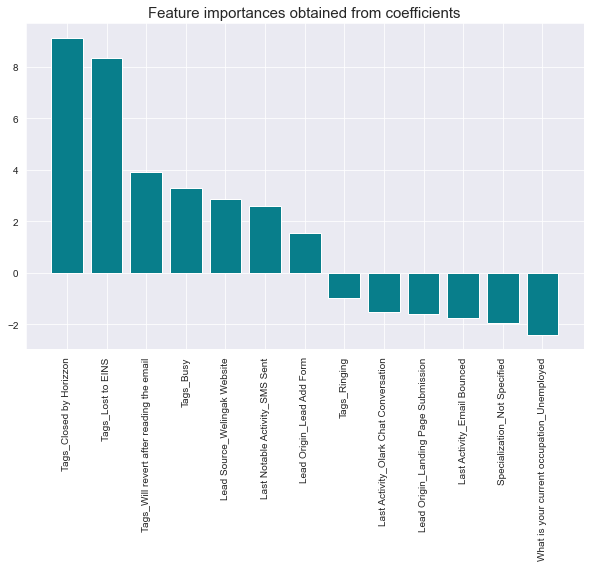

In [153]:
importances = pd.DataFrame(data={
    'Attribute': X_train[col].columns,
    'Importance': model3.params[1:]
})

importances.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation=90)
plt.show()

# Conclusion

Evaluation metrics for the Train Data:

- Accuracy : 82.59%
- Sensitivity : 87.78%
- Specificity : 79.44%
- False postive rate : 20.55%
- Positive predictive value : 72.13%
- Negative predictive value : 91.47%
- Precision : 72.13%
- Recall : 87.78%

Evaluation metrics for the Test Data:

- Accuracy : 82.77%
- Sensitivity : 87.22%
- Specificity : 80.04%
- False postive rate : 19.95%
- Positive predictive value : 72.80%
- Negative predictive value : 91.09%
- Precision : 72.81%
- Recall : 87.22%

We can see that the model performs reasonable well on the test set signifying that the model is generalizing well. It has a sensitivity value of 87.22%. This means out of all converted leads, model is able to correctly predict 87.22% of them correctly which is a very good measure. 

We have also assigned Lead scores to each customer in the range of 0-100 which can be used by X Education to target potential leads. A higher score means that the lead is hot, i.e. is most likely to convert whereas a lower score means that the lead is cold and will mostly not get converted.

## Recommendations

The most important parameters for the prediction of Lead conversion are the following:

1. Tags:
    * Closed by Horizzon
    * Lost to EINS
    * Will revert after reading the email
    * Busy
    * Ringing 
2. Lead Source
    * Welingak Website
3. Last Notable Activity
    * SMS Sent
4. What is your current occupation
    * Unemployed
5. Specialization
    * Not Specified
6. Last Activity
    * Email Bounced
    * Olark Chat Conversation
7. Lead Origin
    * Landing Page Submission
    * Lead Add Form

Out of these, following parameters have a positive relationship with the log odds of lead conversion: 
* Tag assigned to a customer is any of the following
    * Closed by Horizzon
    * Lost to EINS 
    * Will revert after reading the email
    * Busy
* Lead Source is Welingak Website
* Last Notable Activity performed by the customer is SMS Sent
* Lead Origin is Lead Add Form

This means that any customer with the above parameters is a very promising lead and is most likely to convert into paying customer. Hence, X Education should concentrate on such customers to increase the conversion rate of their leads

On the other hand, following parameters have a negative relationship with the log odds:
* Tags assigned to a customer is Ringing
* Last Activity performed by the customer is any of the following
    * Olark Chat Conversation, 
    * Email Bounced
* Lead Origin is Landing Page Submission
* Specialization is Not Specified by the customer
* Customer is Unemployed	

This means that any customer with the above parameters is less likely to convert into paying customer

In conclusion, X Education can look at the lead scores assigned to each customer, and along with the above parameters can focus their efforts in such a way as to maximize the lead conversion ratio